<a href="https://colab.research.google.com/github/Madhu132006/classify_diabetics.py/blob/main/diabetics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


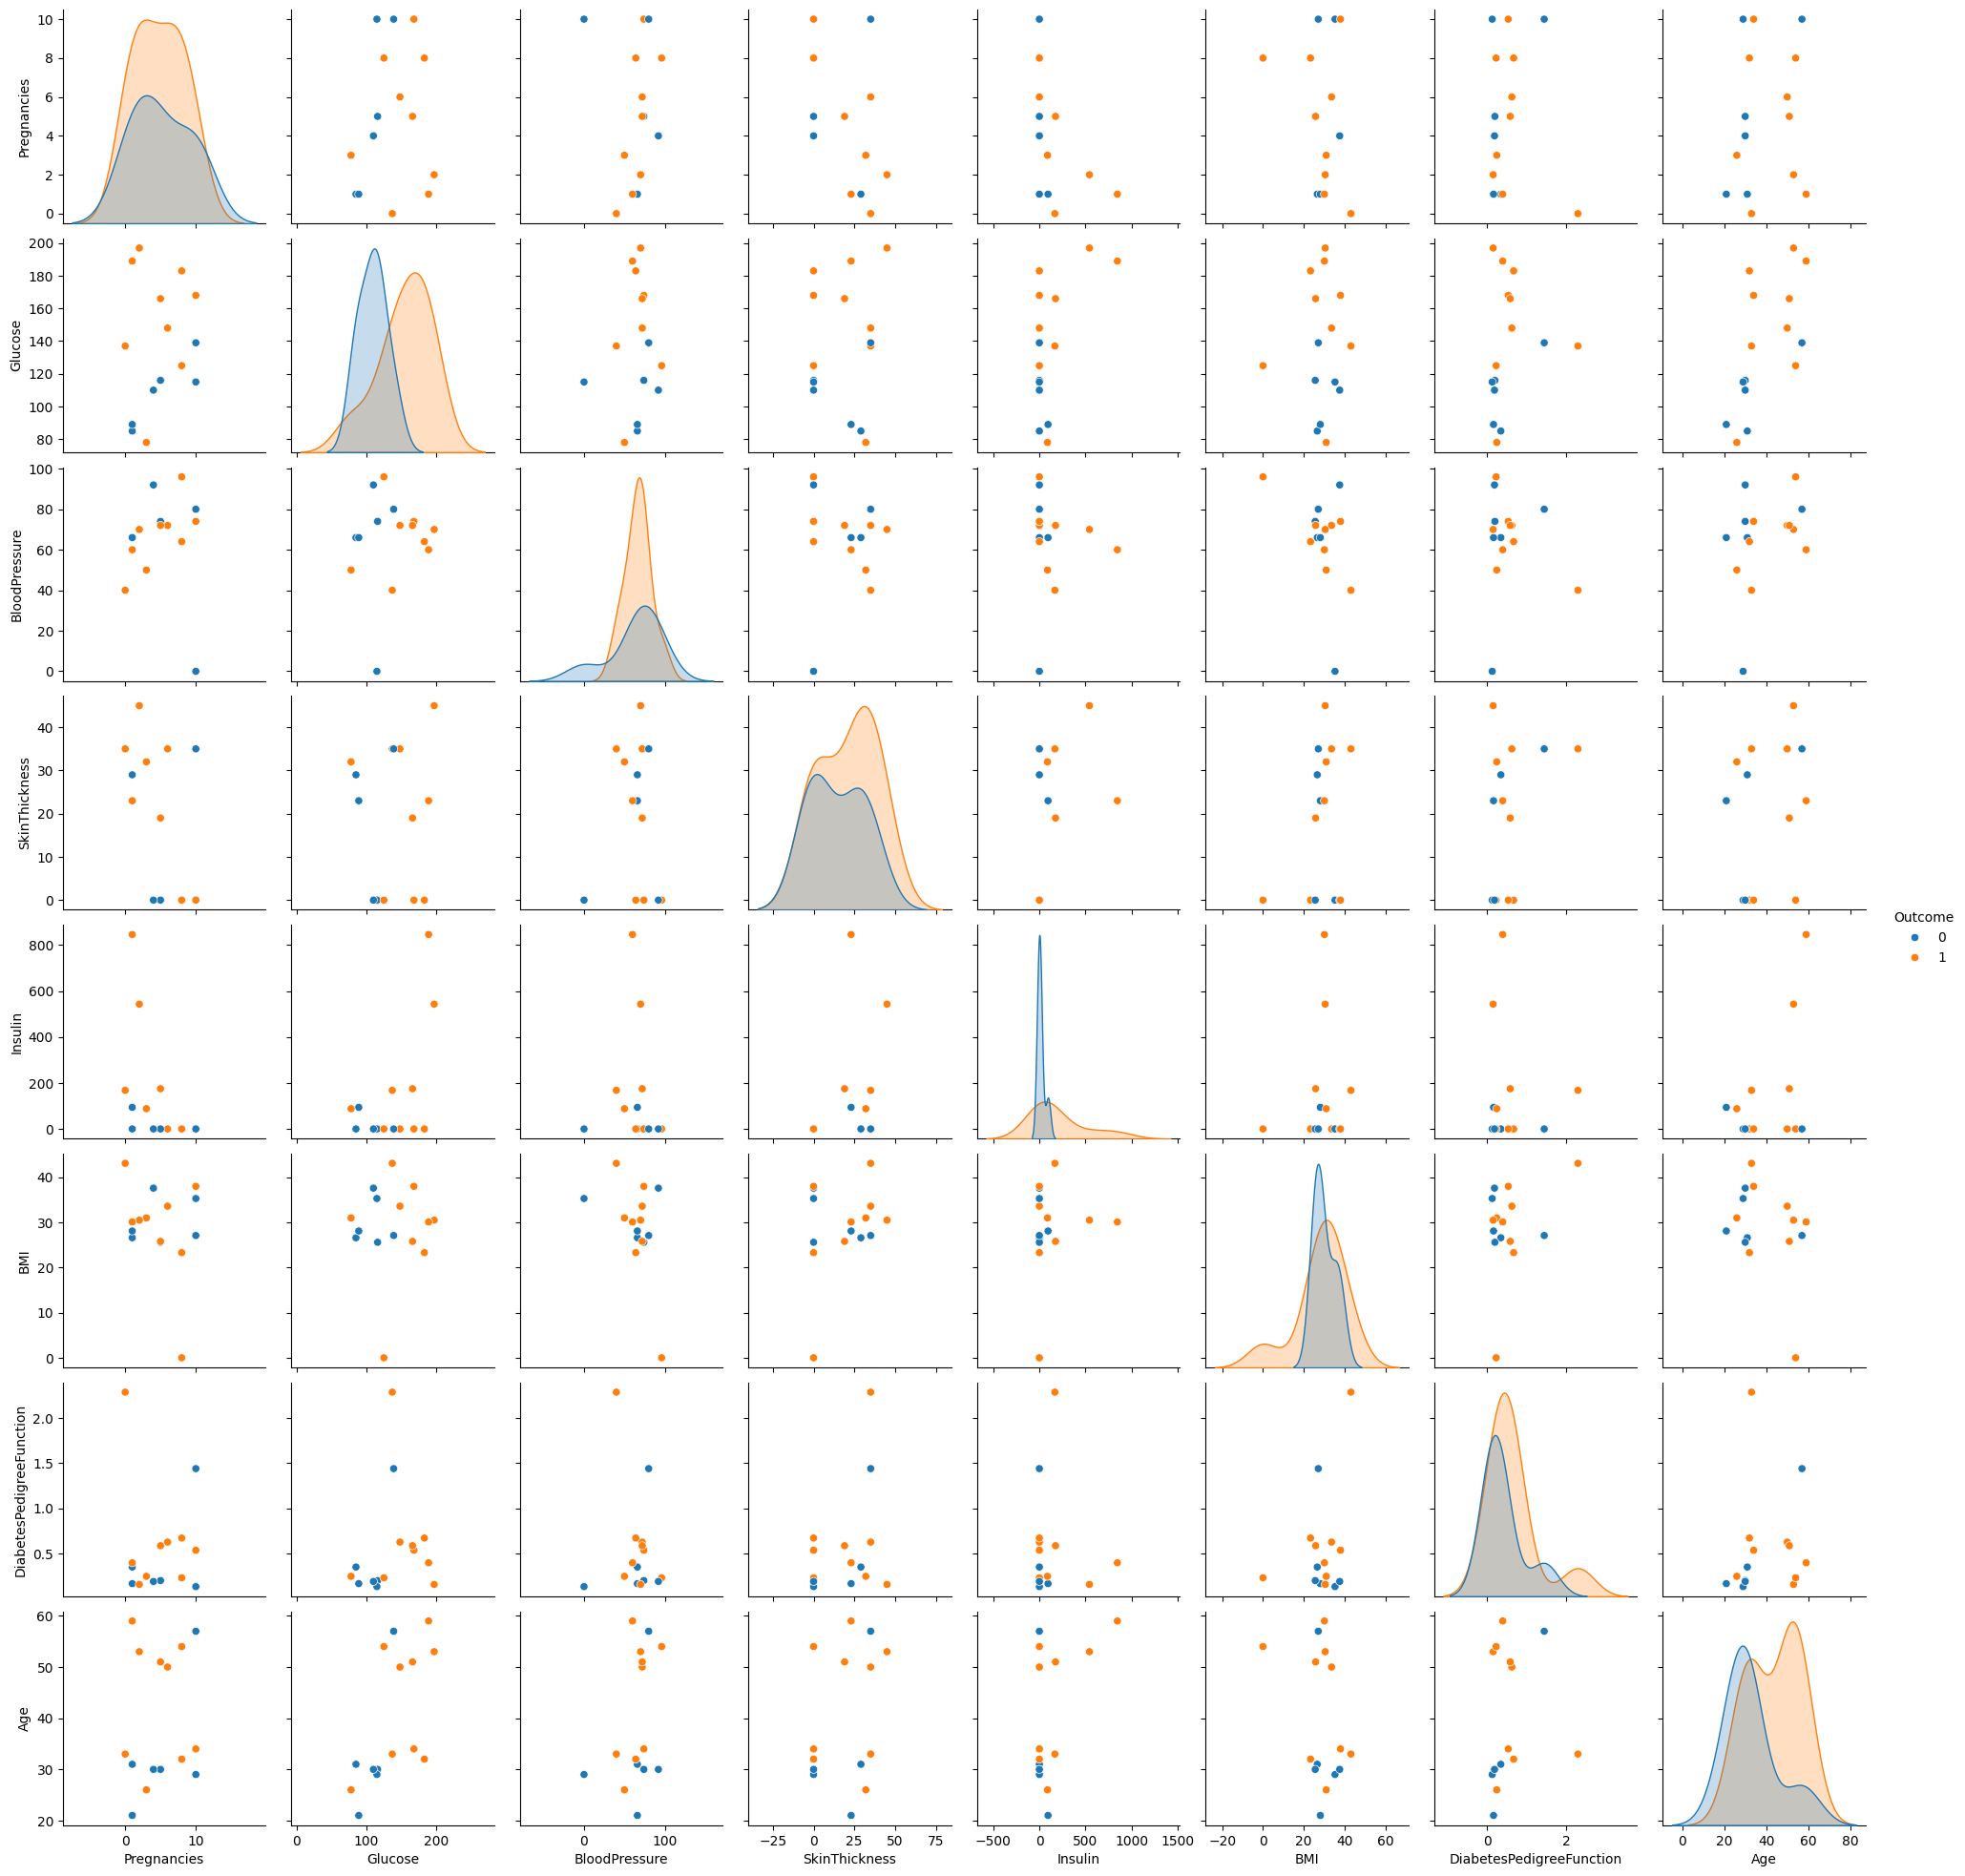

Confusion Matrix:
[[0 0]
 [2 2]]
Accuracy: 50.00%


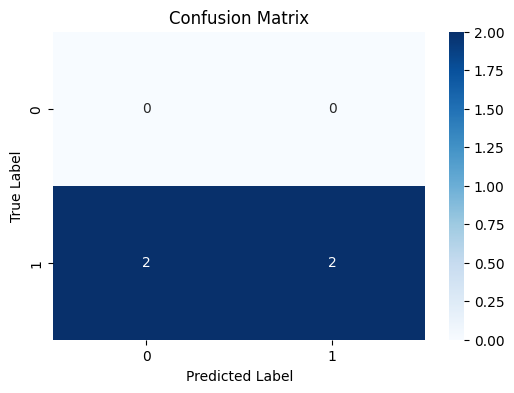

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize data manually mimicking the Pima Indians Diabetes dataset
data = [
    [6, 148, 72, 35, 0, 33.6, 0.627, 50, 1],
    [1, 85, 66, 29, 0, 26.6, 0.351, 31, 0],
    [8, 183, 64, 0, 0, 23.3, 0.672, 32, 1],
    [1, 89, 66, 23, 94, 28.1, 0.167, 21, 0],
    [0, 137, 40, 35, 168, 43.1, 2.288, 33, 1],
    [5, 116, 74, 0, 0, 25.6, 0.201, 30, 0],
    [3, 78, 50, 32, 88, 31.0, 0.248, 26, 1],
    [10, 115, 0, 0, 0, 35.3, 0.134, 29, 0],
    [2, 197, 70, 45, 543, 30.5, 0.158, 53, 1],
    [8, 125, 96, 0, 0, 0.0, 0.232, 54, 1],
    [4, 110, 92, 0, 0, 37.6, 0.191, 30, 0],
    [10, 168, 74, 0, 0, 38.0, 0.537, 34, 1],
    [10, 139, 80, 35, 0, 27.1, 1.441, 57, 0],
    [1, 189, 60, 23, 846, 30.1, 0.398, 59, 1],
    [5, 166, 72, 19, 175, 25.8, 0.587, 51, 1]
]

columns = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
    'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
]

# Create DataFrame
df = pd.DataFrame(data, columns=columns)

# Display first 5 rows
print(df.head())

# Visualize the data
sns.pairplot(df, hue='Outcome')
plt.show()

# Prepare data for modeling
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize and train logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:")
print(cm)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()